In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras import optimizers
from sklearn.metrics import mean_absolute_error 
import seaborn as sb
import warnings 

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

matplotlib.style.use('ggplot')

np.random.seed(42)

In [4]:
train_df = pd.read_csv("drive/MyDrive/ST4248/data/resale_train_feature_selection.csv")
test_df = pd.read_csv("drive/MyDrive/ST4248/data/resale_test_feature_selection.csv")

# Price

## Data Check

In [5]:
X_train = train_df.drop("resale_price", axis = 1)
X_test = test_df.drop("resale_price", axis = 1)

y_train = train_df["resale_price"]
y_test = test_df["resale_price"]

In [6]:
X_train.head()

,floor_area_sqm,nearest_mrt_dist,total_resales_in_town,remaining_lease,town_BUKIT MERAH,street_name_ANG MO KIO ST 51,street_name_DAWSON RD,flat_type_3 ROOM,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_19 TO 21,town_PASIR RIS,flat_model_Apartment,flat_model_Maisonette,flat_model_Premium Apartment,total_nearby_mrt,nearest_mall_dist,street_name_CANTONMENT RD,flat_model_Model A,flat_model_Improved,flat_model_DBSS,flat_model_New Generation,flat_model_Simplified,storey_range_16 TO 18,storey_range_07 TO 09,flat_model_Standard,flat_model_Type S1,nearest_bus_stop_Blk 18,street_name_JLN BAHAGIA,nearest_primary_school_ZHANGDE PRIMARY SCHOOL,town_CHOA CHU KANG,flat_type_2 ROOM,town_BUKIT PANJANG,town_HOUGANG,town_MARINE PARADE,town_SEMBAWANG,town_BUKIT BATOK,flat_type_EXECUTIVE,flat_type_5 ROOM,total_resales_in_block,nearest_mrt_Outram Park,town_ANG MO KIO,total_resales_in_street,nearest_primary_school_RADIN MAS PRIMARY SCHOOL,nearest_mrt_Admiralty,nearest_mrt_Kallang,nearest_mrt_Sengkang,nearest_school_WOODLANDS SECONDARY SCHOOL,nearest_mrt_Tiong Bahru,nearest_mrt_Toa Payoh,town_BEDOK,nearest_bus_stop_Opp Blk 565,nearest_school_BLANGAH RISE PRIMARY SCHOOL,nearest_school_GAN ENG SENG PRIMARY SCHOOL,nearest_school_KHENG CHENG SCHOOL,nearest_mall_Sun Plaza,street_name_ANG MO KIO ST 44,town_CENTRAL AREA,storey_range_10 TO 12,street_name_CLEMENTI AVE 3,flat_type_4 ROOM,street_name_MCNAIR RD,town_WOODLANDS,town_TAMPINES,town_SENGKANG,town_QUEENSTOWN,street_name_ANG MO KIO AVE 3,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_37 TO 39,town_JURONG EAST,street_name_TELOK BLANGAH ST 31
0,-1.132448,-0.676490,-0.443615,-1.143025,-0.193241,-0.050572,-0.044588,1.693641,-0.459028,-0.542843,-0.128147,-0.162716,-0.177705,-0.154259,-0.333963,-0.040003,1.391526,-0.050572,-0.792027,-0.540655,-0.116198,2.632126,-0.216528,-0.200236,-0.539341,-0.174281,-0.044588,-0.041274,-0.041274,-0.091039,-0.231190,-0.167248,-0.173416,-0.235244,-0.081007,-0.191657,-0.208514,-0.256634,-0.540655,-0.777346,-0.069584,4.795832,0.073626,-0.065344,-0.224305,-0.073584,-0.305965,-0.077382,-0.1199,-0.086165,-0.235914,-0.050572,-0.104347,-0.047673,-0.087818,-0.135926,-0.050572,-0.098646,2.071076,-0.055926,-0.861523,-0.053315,-0.309827,-0.276757,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
1,-2.010290,0.201327,1.252320,1.352967,-0.193241,-0.050572,-0.044588,-0.590444,2.178515,-0.542843,-0.128147,-0.162716,-0.177705,-0.154259,-0.333963,-0.040003,-1.475172,-0.050572,1.262584,-0.540655,-0.116198,-0.379921,-0.216528,-0.200236,-0.539341,-0.174281,-0.044588,-0.041274,-0.041274,-0.091039,-0.231190,5.979130,-0.173416,-0.235244,-0.081007,-0.191657,-0.208514,-0.256634,-0.540655,0.477218,-0.069584,-0.208514,2.439851,-0.065344,-0.224305,-0.073584,-0.305965,-0.077382,-0.1199,-0.086165,-0.235914,-0.050572,-0.104347,-0.047673,-0.087818,-0.135926,-0.050572,-0.098646,-0.482841,-0.055926,-0.861523,-0.053315,-0.309827,-0.276757,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
2,1.166660,-0.384369,-0.198538,-0.290599,-0.193241,-0.050572,-0.044588,-0.590444,2.178515,-0.542843,-0.128147,-0.162716,-0.177705,-0.154259,-0.333963,-0.040003,-1.093044,-0.050572,-0.792027,1.849609,-0.116198,-0.379921,-0.216528,-0.200236,-0.539341,-0.174281,-0.044588,-0.041274,-0.041274,-0.091039,4.325448,-0.167248,-0.173416,-0.235244,-0.081007,-0.191657,-0.208514,-0.256634,1.849609,-0.463705,-0.069584,-0.208514,-0.577086,-0.065344,-0.224305,-0.073584,-0.305965,-0.077382,-0.1199,-0.086165,-0.235914,-0.050572,-0.104347,-0.047673,-0.087818,-0.135926,-0.050572,-0.098646,-0.482841,-0.055926,-0.861523,-0.053315,-0.309827,-0.276757,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
3,0.372423,1.731095,1.252320,-0.613741,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,-0.542843,-0.128147,-0.162716,-0.177705,-0.154259,-0.333963

In [7]:
X_test.head()

,floor_area_sqm,nearest_mrt_dist,total_resales_in_town,remaining_lease,town_BUKIT MERAH,street_name_ANG MO KIO ST 51,street_name_DAWSON RD,flat_type_3 ROOM,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_19 TO 21,town_PASIR RIS,flat_model_Apartment,flat_model_Maisonette,flat_model_Premium Apartment,total_nearby_mrt,nearest_mall_dist,street_name_CANTONMENT RD,flat_model_Model A,flat_model_Improved,flat_model_DBSS,flat_model_New Generation,flat_model_Simplified,storey_range_16 TO 18,storey_range_07 TO 09,flat_model_Standard,flat_model_Type S1,nearest_bus_stop_Blk 18,street_name_JLN BAHAGIA,nearest_primary_school_ZHANGDE PRIMARY SCHOOL,town_CHOA CHU KANG,flat_type_2 ROOM,town_BUKIT PANJANG,town_HOUGANG,town_MARINE PARADE,town_SEMBAWANG,town_BUKIT BATOK,flat_type_EXECUTIVE,flat_type_5 ROOM,total_resales_in_block,nearest_mrt_Outram Park,town_ANG MO KIO,total_resales_in_street,nearest_primary_school_RADIN MAS PRIMARY SCHOOL,nearest_mrt_Admiralty,nearest_mrt_Kallang,nearest_mrt_Sengkang,nearest_school_WOODLANDS SECONDARY SCHOOL,nearest_mrt_Tiong Bahru,nearest_mrt_Toa Payoh,town_BEDOK,nearest_bus_stop_Opp Blk 565,nearest_school_BLANGAH RISE PRIMARY SCHOOL,nearest_school_GAN ENG SENG PRIMARY SCHOOL,nearest_school_KHENG CHENG SCHOOL,nearest_mall_Sun Plaza,street_name_ANG MO KIO ST 44,town_CENTRAL AREA,storey_range_10 TO 12,street_name_CLEMENTI AVE 3,flat_type_4 ROOM,street_name_MCNAIR RD,town_WOODLANDS,town_TAMPINES,town_SENGKANG,town_QUEENSTOWN,street_name_ANG MO KIO AVE 3,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_37 TO 39,town_JURONG EAST,street_name_TELOK BLANGAH ST 31
0,-0.212805,0.004724,1.291532,1.224825,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,-0.542843,-0.128147,-0.162716,-0.177705,-0.154259,-0.333963,-0.040003,-0.256180,-0.050572,1.262584,-0.540655,-0.116198,-0.379921,-0.216528,-0.200236,-0.539341,-0.174281,-0.044588,-0.041274,-0.041274,-0.091039,-0.23119,-0.167248,-0.173416,-0.235244,-0.081007,-0.191657,-0.208514,-0.256634,-0.540655,0.477218,-0.069584,-0.208514,0.960961,-0.065344,-0.224305,-0.073584,-0.305965,-0.077382,-0.1199,-0.086165,-0.235914,-0.050572,-0.104347,-0.047673,-0.087818,-0.135926,-0.050572,-0.098646,2.071076,-0.055926,1.160735,-0.053315,-0.309827,-0.276757,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
1,-0.087399,1.306314,0.242602,1.403110,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,-0.542843,-0.128147,-0.162716,-0.177705,-0.154259,-0.333963,-0.824070,-0.634544,-0.050572,1.262584,-0.540655,-0.116198,-0.379921,-0.216528,-0.200236,-0.539341,-0.174281,-0.044588,-0.041274,-0.041274,-0.091039,-0.23119,-0.167248,-0.173416,-0.235244,-0.081007,-0.191657,-0.208514,-0.256634,-0.540655,-0.150064,-0.069584,-0.208514,-0.044685,-0.065344,-0.224305,-0.073584,-0.305965,-0.077382,-0.1199,-0.086165,-0.235914,-0.050572,-0.104347,-0.047673,-0.087818,-0.135926,-0.050572,-0.098646,-0.482841,-0.055926,1.160735,-0.053315,-0.309827,-0.276757,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
2,0.038007,-0.341318,0.644528,-0.808741,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,1.842152,-0.128147,-0.162716,-0.177705,-0.154259,-0.333963,0.744063,0.315323,-0.050572,-0.792027,-0.540655,-0.116198,2.632126,-0.216528,-0.200236,-0.539341,-0.174281,-0.044588,-0.041274,-0.041274,-0.091039,-0.23119,-0.167248,-0.173416,-0.235244,-0.081007,-0.191657,-0.208514,-0.256634,-0.540655,-1.090987,-0.069584,-0.208514,-0.222152,-0.065344,-0.224305,-0.073584,-0.305965,-0.077382,-0.1199,-0.086165,-0.235914,-0.050572,-0.104347,-0.047673,-0.087818,-0.135926,-0.050572,-0.098646,-0.482841,-0.055926,1.160735,-0.053315,-0.309827,3.613278,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
3,0.748640,1.265904,1.291532,1.386396,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,-0.542843,-0.128147,-0.162716,-0.177705,-0.154259,2.994345,-0.824

## Make the Deep Neural Network
 * Define a sequential model
 * Add some dense layers
 * Use '**relu**' as the activation function in the hidden layers
 * Use a '**normal**' initializer as the kernal_intializer 
           Initializers define the way to set the initial random weights of Keras layers.
 * We will use mean_absolute_error as a loss function
 * Define the output layer with only one node
 * Use 'linear 'as the activation function for the output layer
 


In [8]:
NN_model = Sequential()

**The Input Layer**

In [9]:
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

**The Hidden Layers**

In [10]:
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

**The Output Layer**

In [11]:
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

**Compile the network**

In [12]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9600      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 174,465
Trainable params: 174,465
Non-trainable params: 0
_________________________________________________________________


## Train the model :

In [24]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2)

Epoch 1/500
89/89 [==============================] - 2s 10ms/step - loss: 536743.7500 - mean_absolute_error: 536743.7500 - val_loss: 397827.2500 - val_mean_absolute_error: 397827.2500
Epoch 2/500
89/89 [==============================] - 1s 7ms/step - loss: 134036.4688 - mean_absolute_error: 134036.4688 - val_loss: 65537.7031 - val_mean_absolute_error: 65537.7031
Epoch 3/500
89/89 [==============================] - 1s 6ms/step - loss: 55781.7734 - mean_absolute_error: 55781.7734 - val_loss: 50988.5625 - val_mean_absolute_error: 50988.5625
Epoch 4/500
89/89 [==============================] - 1s 6ms/step - loss: 45372.0234 - mean_absolute_error: 45372.0234 - val_loss: 43434.9531 - val_mean_absolute_error: 43434.9531
Epoch 5/500
89/89 [==============================] - 1s 7ms/step - loss: 39795.4375 - mean_absolute_error: 39795.4375 - val_loss: 42792.1250 - val_mean_absolute_error: 42792.1250
Epoch 6/500
89/89 [==============================] - 0s 5ms/step - loss: 37335.9023 - mean_absolut

## Test the model

In [25]:
y_train_pred = NN_model.predict(X_train)
y_test_pred = NN_model.predict(X_test)

28/28 [==============================] - 0s 1ms/step


In [26]:
y_train_pred = y_train_pred.flatten()
y_test_pred = y_test_pred.flatten()

In [27]:
train_n = X_train.shape[0]
train_p = X_train.shape[1]
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
train_r2 = r2_score(y_train, y_train_pred)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [28]:
test_n = X_test.shape[0]
test_p = X_test.shape[1]
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
test_r2 = r2_score(y_test, y_test_pred)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [29]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train RMSE:", train_rmse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 2.92%
Train RMSE: 26642.287082060706
Train R2: 0.975277327887201
Train Adj R2: 0.9747475052007408

Test MAPE: 5.23%
Test RMSE: 42732.13023848114
Test R2: 0.9331120891819689
Test Adj R2: 0.9269786252407863


## Plots

In [30]:
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

Text(0.5, 1.0, 'Residual Plot')

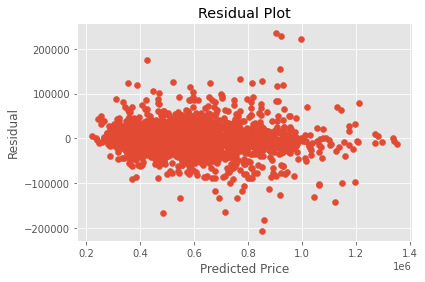

In [31]:
#idk residual plot is vs predicted value or actual value lol
plt.scatter(y_train_pred, train_residuals)
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.title("Residual Plot")

Text(0.5, 1.0, 'Residual Plot')

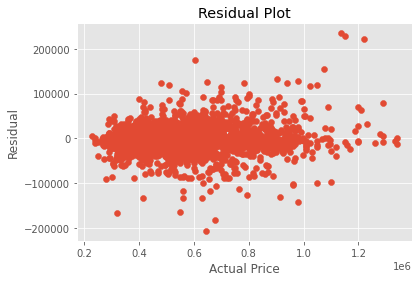

In [32]:
plt.scatter(y_train, train_residuals)
plt.xlabel("Actual Price")
plt.ylabel("Residual")
plt.title("Residual Plot")

Text(0.5, 1.0, 'Actual vs Predicted Price')

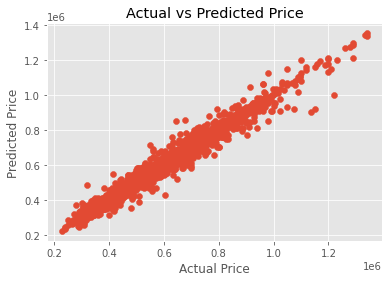

In [33]:
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")

In [36]:
try:
    import shap
except ModuleNotFoundError: # Install flax if missing
    !pip install --quiet https://github.com/ceshine/shap/archive/master.zip
    import shap

     - 58.0 MB 8.5 MB/s 0:00:05
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.6 MB/s eta 0:00:00


In [43]:
%%time
e = shap.DeepExplainer(NN_model, X_train)

AttributeError: ignored

In [ ]:
%%time
shap_values = e.shap_values(X_test)

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/module.py:1117: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


AttributeError: ignored

In [ ]:
shap_values.shape

NameError: ignored

In [ ]:
df = pd.DataFrame({
    "mean_abs_shap": np.mean(np.abs(shap_values), axis=0), 
    "stdev_abs_shap": np.std(np.abs(shap_values), axis=0), 
    "name": features
})
df.sort_values("mean_abs_shap", ascending=False)[:10]

In [ ]:
shap.summary_plot(shap_values, features=x_samples, feature_names=features)

# Price / Sqm

## Data Check

In [ ]:
train_df2 = train_df.copy()
test_df2 = test_df.copy()

train_df2["floor_area_sqm"] = train_df2["floor_area_sqm"].apply(lambda x : x * 23.922319549360488 + 95.09078798185942)
test_df2["floor_area_sqm"] = test_df2["floor_area_sqm"].apply(lambda x : x * 23.922319549360488 + 95.09078798185942)

train_df2["resale_price_per_sqm"] = train_df2["resale_price"] / train_df2["floor_area_sqm"]
test_df2["resale_price_per_sqm"] = test_df2["resale_price"] / test_df2["floor_area_sqm"]

In [ ]:
X_train = train_df2.drop(["resale_price_per_sqm", "resale_price", "floor_area_sqm"], axis = 1)
X_test = test_df2.drop(["resale_price_per_sqm", "resale_price", "floor_area_sqm"], axis = 1)

y_train = train_df2["resale_price_per_sqm"]
y_test = test_df2["resale_price_per_sqm"]

In [ ]:
X_train.head()

,nearest_mrt_dist,total_resales_in_town,remaining_lease,town_BUKIT MERAH,street_name_ANG MO KIO ST 51,street_name_DAWSON RD,flat_type_3 ROOM,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_19 TO 21,...,town_SENGKANG,town_QUEENSTOWN,street_name_ANG MO KIO AVE 3,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_37 TO 39,town_JURONG EAST,street_name_TELOK BLANGAH ST 31
0,-0.676490,-0.443615,-1.143025,-0.193241,-0.050572,-0.044588,1.693641,-0.459028,-0.542843,-0.128147,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
1,0.201327,1.252320,1.352967,-0.193241,-0.050572,-0.044588,-0.590444,2.178515,-0.542843,-0.128147,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
2,-0.384369,-0.198538,-0.290599,-0.193241,-0.050572,-0.044588,-0.590444,2.178515,-0.542843,-0.128147,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
3,1.731095,1.252320,-0.613741,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,-0.542843,-0.128147,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
4,1.054745,1.291532,0.857112,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,1.842152,-0.128147,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507


In [ ]:
X_test.head()

,nearest_mrt_dist,total_resales_in_town,remaining_lease,town_BUKIT MERAH,street_name_ANG MO KIO ST 51,street_name_DAWSON RD,flat_type_3 ROOM,storey_range_01 TO 03,storey_range_04 TO 06,storey_range_19 TO 21,...,town_SENGKANG,town_QUEENSTOWN,street_name_ANG MO KIO AVE 3,storey_range_22 TO 24,storey_range_25 TO 27,storey_range_28 TO 30,storey_range_31 TO 33,storey_range_37 TO 39,town_JURONG EAST,street_name_TELOK BLANGAH ST 31
0,0.004724,1.291532,1.224825,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,-0.542843,-0.128147,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
1,1.306314,0.242602,1.403110,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,-0.542843,-0.128147,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
2,-0.341318,0.644528,-0.808741,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,1.842152,-0.128147,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
3,1.265904,1.291532,1.386396,-0.193241,-0.050572,-0.044588,-0.590444,-0.459028,-0.542843,-0.128147,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507
4,-0.978913,0.036737,-1.209882,-0.193241,-0.050572,-0.044588,1.693641,-0.459028,-0.542843,-0.128147,...,-0.261617,-0.148379,-0.089443,-0.111079,-0.1001,-0.067497,-0.047673,-0.047673,-0.148379,-0.075507


## Make the Deep Neural Network
 * Define a sequential model
 * Add some dense layers
 * Use '**relu**' as the activation function in the hidden layers
 * Use a '**normal**' initializer as the kernal_intializer 
           Initializers define the way to set the initial random weights of Keras layers.
 * We will use mean_absolute_error as a loss function
 * Define the output layer with only one node
 * Use 'linear 'as the activation function for the output layer
 


In [ ]:
NN_model = Sequential()

**The Input Layer**

In [ ]:
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

**The Hidden Layers**

In [ ]:
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

**The Output Layer**

In [ ]:
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

**Compile the network**

In [ ]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               9472      
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 174,337
Trainable params: 174,337
Non-trainable params: 0
_________________________________________________________________


**Define a checkpoint callback :**

In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

## Train the model :

In [ ]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500
88/89 [============================>.] - ETA: 0s - loss: 3527.3071 - mean_absolute_error: 3527.3071
Epoch 1: val_loss improved from inf to 657.11688, saving model to Weights-001--657.11688.hdf5
89/89 [==============================] - 2s 8ms/step - loss: 3520.9810 - mean_absolute_error: 3520.9810 - val_loss: 657.1169 - val_mean_absolute_error: 657.1169
Epoch 2/500
80/89 [=========================>....] - ETA: 0s - loss: 530.3192 - mean_absolute_error: 530.3192
Epoch 2: val_loss improved from 657.11688 to 430.65860, saving model to Weights-002--430.65860.hdf5
89/89 [==============================] - 1s 6ms/step - loss: 522.3741 - mean_absolute_error: 522.3741 - val_loss: 430.6586 - val_mean_absolute_error: 430.6586
Epoch 3/500
87/89 [============================>.] - ETA: 0s - loss: 416.5964 - mean_absolute_error: 416.5964
Epoch 3: val_loss did not improve from 430.65860
89/89 [==============================] - 1s 6ms/step - loss: 415.7528 - mean_absolute_error: 415.7528 - v

## Test the model

In [ ]:
y_train_pred = NN_model.predict(X_train)
y_test_pred = NN_model.predict(X_test)

28/28 [==============================] - 0s 2ms/step


In [ ]:
y_train_pred = y_train_pred.flatten()
y_test_pred = y_test_pred.flatten()

In [ ]:
y_train = y_train * train_df2["floor_area_sqm"]
y_train_pred = y_train_pred * train_df2["floor_area_sqm"]

In [ ]:
y_test = y_test * test_df2["floor_area_sqm"]
y_test_pred = y_test_pred * test_df2["floor_area_sqm"]

In [ ]:
train_n = X_train.shape[0]
train_p = X_train.shape[1]
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
train_r2 = r2_score(y_train, y_train_pred)
train_adj_r2 = 1 - (1 - train_r2) * (train_n - 1) / (train_n - train_p - 1)

In [ ]:
test_n = X_test.shape[0]
test_p = X_test.shape[1]
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
test_r2 = r2_score(y_test, y_test_pred)
test_adj_r2 = 1 - (1 - test_r2) * (test_n - 1) / (test_n - test_p - 1)

In [ ]:
print("Train MAPE: {:.2f}%".format(train_mape * 100))
print("Train RMSE:", train_rmse)
print("Train R2:", train_r2)
print("Train Adj R2:", train_adj_r2)
print()
print("Test MAPE: {:.2f}%".format(test_mape * 100))
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)
print("Test Adj R2:", test_adj_r2)

Train MAPE: 2.49%
Train RMSE: 24467.297240622403
Train R2: 0.9791491195767242
Train Adj R2: 0.9787084379696313

Test MAPE: 5.45%
Test RMSE: 42638.28415732599
Test R2: 0.9334055580765319
Test Adj R2: 0.9273889810215651


In [ ]:
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

## Plots

Text(0.5, 1.0, 'Residual Plot')

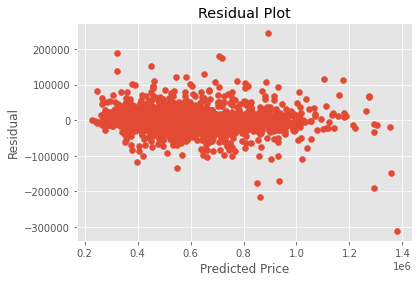

In [ ]:
#idk residual plot is vs predicted value or actual value lol
plt.scatter(y_train_pred, train_residuals)
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.title("Residual Plot")

Text(0.5, 1.0, 'Residual Plot')

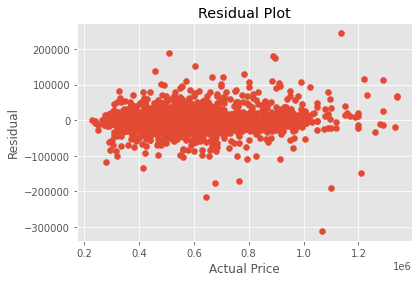

In [ ]:
plt.scatter(y_train, train_residuals)
plt.xlabel("Actual Price")
plt.ylabel("Residual")
plt.title("Residual Plot")

Text(0.5, 1.0, 'Actual vs Predicted Price')

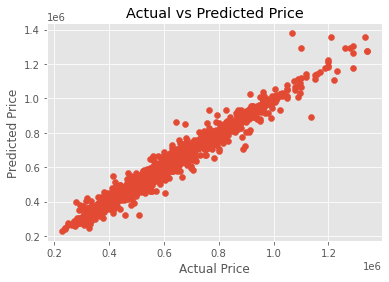

In [ ]:
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")